In [1]:
import pandas as pd
from astropy.time import Time
from pycbc import dq
import h5py
from healpy.newvisufunc import projview
import numpy as np

In [40]:
def obtime(o):
    if o == 'o1':
        s = Time('2015-09-12T00:00:00').gps
        e = Time('2016-01-19T16:00:00').gps
        hsegs = dq.query_flag('H1','DATA',s,e)
        lsegs = dq.query_flag('L1','DATA',s,e)
        return abs((hsegs & lsegs).coalesce())
    elif o=='o2':
        s = Time('2016-11-30T16:00:00').gps
        e = Time('2017-08-25T22:00:00').gps
        hsegs = dq.query_flag('H1','DATA',s,e)
        lsegs = dq.query_flag('L1','DATA',s,e)
        vsegs = dq.query_flag('V1','DATA',s,e)
    elif o=='o3a':
        s = Time('2019-04-01T15:00:00').gps
        e = Time('2019-10-01T15:00:00').gps
        hsegs = dq.query_flag('H1','DATA',s,e)
        lsegs = dq.query_flag('L1','DATA',s,e)
        vsegs = dq.query_flag('V1','DATA',s,e)
    elif o=='o3b':
        s = Time('2019-11-01T15:00:00').gps
        e = Time('2020-03-27T17:00:00').gps
        hsegs = dq.query_flag('H1','DATA',s,e)
        lsegs = dq.query_flag('L1','DATA',s,e)
        vsegs = dq.query_flag('V1','DATA',s,e)
    hlv = abs((hsegs & lsegs & vsegs).coalesce())
    hl = abs((hsegs & lsegs).coalesce()) - hlv
    lv = abs((lsegs & vsegs).coalesce()) - hlv
    hv = abs((hsegs & vsegs).coalesce()) - hlv
    return hlv + hl + lv + hv

In [41]:
for o in ['o1','o2','o3a','o3b']:
    print(o,obtime(o))

o1 4234023
o2 10557345
o3a 12923000
o3b 10765843


In [42]:
4234023/(60*60*24*364.25)

0.13453643331045528

In [43]:
df={}
for o in ['o1','o2','o3a','o3b']:
    df[o] = pd.read_csv('./search_result_'+o+'.csv')
    df[o]['false_alarm_rate'] *= (60*60*24*364.25)/obtime(o)
    print(df[o]['false_alarm_rate'])

0     1.370516
1    11.489421
2    30.566533
Name: false_alarm_rate, dtype: float64
0     0.502797
1     4.816709
2     5.016336
3    11.150166
4    14.239759
5    17.099587
6    23.792909
7    25.074520
8    32.110700
Name: false_alarm_rate, dtype: float64
0      1.501150
1      3.684863
2      6.151596
3      8.886722
4      8.927919
5      9.796480
6     11.153073
7     14.667296
8     20.207266
9     22.383179
10    22.499945
11    27.038012
Name: false_alarm_rate, dtype: float64
0     0.454142
1     1.095559
2     1.858412
3     3.407234
4     7.184336
5    13.675170
6    17.462806
7    18.012049
Name: false_alarm_rate, dtype: float64


In [44]:
frames = [df['o1'],df['o2'],df['o3a'],df['o3b']]

In [45]:
result = pd.concat(frames)

In [46]:
result.sort_values(by='false_alarm_rate',ascending=True,inplace=True)

In [47]:
result

gwname                         gwtime    gwstat       grbname  \
0   200205_201716  2020-02-05 20:17:16.676025391  4.175298  GRB200205845   
0   170330_222948  2017-03-30 22:29:48.292968750  6.867164    GRB170330A   
1   191213_060532  2019-12-13 06:05:32.067871094  4.082384  GRB191213254   
0   151001_082025  2015-10-01 08:20:25.612304688  3.216300  GRB151001348   
0   190404_070114  2019-04-04 07:01:14.184570313  1.717899  GRB190404293   
2   191110_140525  2019-11-10 14:05:25.402832031  0.338772  GRB191110587   
3   191213_040623  2019-12-13 04:06:23.358642578  2.728866    GRB191213A   
1   190701_094513  2019-07-01 09:45:13.635498047  3.444505    GRB190701A   
1   170723_161524  2017-07-23 16:15:24.278564453  1.803131  GRB170723677   
2   170409_024157  2017-04-09 02:41:57.491943359  1.875275  GRB170409112   
2   190613_040717  2019-06-13 04:07:17.935302734  1.669169    GRB190613A   
4   200216_090724  2020-02-16 09:07:24.385253906  0.623394  GRB200216380   
3   190827_111245  2019-08-27 11:12:45.835693359  1.306569  GRB190827467   
4   190508_234118  2019-05-08 23:41:18.096435547  0.587935  GRB190508987   
5   190628_123052  2019-06-28 12:30:52.782470703  0.360443  GRB190628521   
3   170402_065048  2017-04-02 06:50:48.413818359  1.078557  GRB170402285   
6   190726_152445  2019-07-26 15:24:45.007812500  0.653950  GRB190726642   
1   151029_074936  2015-10-29 07:49:36.257080078  4.217384    GRB151029A   
5   191119_061605  2019-11-19 06:16:05.898925781  5.132669  GRB191119261   
4   170424_101224  2017-04-24 10:12:24.813476563  1.744711  GRB170424425   
7   190623_110326  2019-06-23 11:03:26.475097656  0.667043  GRB190623461   
5   170626_093721  2017-06-26 09:37:21.972900391  0.376057    GRB170626A   
6   200317_004025  2020-03-17 00:40:25.055419922  0.621945  GRB200317028   
7   200117_122400  2020-01-17 12:24:00.887939453  2.896282  GRB200117517   
8   190919_181958  2019-09-19 18:19:58.394287109  0.726322  GRB190919764   
9   190805_044554  2019-08-05 04:45:54.454589844  3.164267  GRB190805199   
10  190422_160459  2019-04-22 16:04:59.637695313  4.248449  GRB190422670   
6   170825_120003  2017-08-25 12:00:03.797363281  0.244853  GRB170825500   
7   170323_012316  2017-03-23 01:23:16.403076172  4.556538  GRB170323058   
11  190824_144634  2019-08-24 14:46:34.029785156  0.774209    GRB190824A   
2   151027_224040  2015-10-27 22:40:40.125732422  7.388242    GRB151027B   
8   170629_125329  2017-06-29 12:53:29.332763672  3.580701    GRB170629A   

                          grbtime  rank_stat  false_alarm_rate  
0   2020-02-05 20:17:23.328000069   5.528784          0.454142  
0   2017-03-30 22:29:51.341320038   6.739229          0.502797  
1   2019-12-13 06:05:33.022000074   4.145176          1.095559  
0   2015-10-01 08:20:35.168999910   5.215897          1.370516  
0   2019-04-04 07:01:21.924999952   3.880540          1.501150  
2   2019-11-10 14:05:34.993000031   3.164339          1.858412  
3   2019-12-13 04:06:23.920500040   1.840464          3.407234  
1   2019-07-01 09:45:20.833659887   1.913866          3.684863  
1   2017-07-23 16:15:27.855000019   2.193204          4.816709  
2   2017-04-09 02:42:00.490000010   2.072366          5.016336  
2   2019-06-13 04:07:18.310159922   0.556981          6.151596  
4   2020-02-16 09:07:25.030999899  -0.002947          7.184336  
3   2019-08-27 11:12:48.546000004  -0.491349          8.886722  
4   2019-05-08 23:41:24.148000002  -0.505508          8.927919  
5   2019-06-28 12:30:55.319999933  -0.826329          9.796480  
3   2017-04-02 06:50:54.391000032  -0.722679         11.150166  
6   2019-07-26 15:24:53.609999895  -1.329848         11.153073  
1   2015-10-29 07:49:38.965140104  -0.480013         11.489421  
5   2019-11-19 06:16:07.174999952  -2.402409         13.675170  
4   2017-04-24 10:12:30.753999949  -1.725181         14.239759  
7   2019-06-23 11:03:27.095000029  -2.704471         14.667296  
5   2017-06-26 09:37:23.124540091  -2.608844         17.099587  
6   202

# Add exclusion distance

In [64]:
from pycbc import cosmology
from scipy import optimize

In [63]:
cosmology.redshift(368)

0.07854668787696836

In [68]:
def convertd(d_old):
    def CacheFunction(d_new):
        z = cosmology.redshift(d_new)
        return d_new / (1+z)**(5/6) - d_old
    sol = optimize.root_scalar(CacheFunction, bracket=[d_old, 1.2*d_old], method='brentq')
    return(sol.root)

In [69]:
convertd(267.12333)

280.5532369863897

In [71]:
280.55/(1+cosmology.redshift(280.55))**(5/6)

267.1203887805181

In [73]:
d = pd.read_csv('/work/yifan.wang/grb/git-notebooks/exclusion_distance.csv')
ex_distance = []
for i in range(len(result.index)):
    gwname = result['gwname'].values[i]
    exd = d[d['gwname']==gwname]['ex_distance'].values
    new_exd = convertd(exd)
    ex_distance.append(new_exd)
    print(gwname,exd,new_exd)

200205_201716 [267.12334833] 280.55325715605505
170330_222948 [184.13954151] 190.52135434094816
191213_060532 [271.98626981] 285.90965729603806
151001_082025 [151.86535364] 156.2062745938146
190404_070114 [321.96994629] 341.48223231564964
191110_140525 [222.09536608] 231.37908881112367
191213_040623 [341.19161867] 363.1039875598857
190701_094513 [280.57426981] 295.3909146543812
170723_161524 [170.27893657] 175.73622675786106
170409_024157 [187.71568708] 194.34777031363822
190613_040717 [323.02166945] 342.66167301448894
200216_090724 [261.32395725] 274.1770063848395
190827_111245 [74.50051285] 75.54535568116172
190508_234118 [364.10846048] 389.064505872689
190628_123052 [296.85565931] 313.44207308123737
170402_065048 [178.19465033] 184.17107346256904
190726_152445 [177.49205749] 183.4214490086369
151029_074936 [63.9352424] 64.70477326984357
191119_061605 [185.58029259] 192.06235479982038
170424_101224 [125.79967328] 128.77847175272564
190623_110326 [227.79225076] 237.55834683102862
1706

In [77]:
result['exclusion_distance'] = np.array(ex_distance)

In [78]:
result

gwname                         gwtime    gwstat       grbname  \
0   200205_201716  2020-02-05 20:17:16.676025391  4.175298  GRB200205845   
0   170330_222948  2017-03-30 22:29:48.292968750  6.867164    GRB170330A   
1   191213_060532  2019-12-13 06:05:32.067871094  4.082384  GRB191213254   
0   151001_082025  2015-10-01 08:20:25.612304688  3.216300  GRB151001348   
0   190404_070114  2019-04-04 07:01:14.184570313  1.717899  GRB190404293   
2   191110_140525  2019-11-10 14:05:25.402832031  0.338772  GRB191110587   
3   191213_040623  2019-12-13 04:06:23.358642578  2.728866    GRB191213A   
1   190701_094513  2019-07-01 09:45:13.635498047  3.444505    GRB190701A   
1   170723_161524  2017-07-23 16:15:24.278564453  1.803131  GRB170723677   
2   170409_024157  2017-04-09 02:41:57.491943359  1.875275  GRB170409112   
2   190613_040717  2019-06-13 04:07:17.935302734  1.669169    GRB190613A   
4   200216_090724  2020-02-16 09:07:24.385253906  0.623394  GRB200216380   
3   190827_111245  2019-08-27 11:12:45.835693359  1.306569  GRB190827467   
4   190508_234118  2019-05-08 23:41:18.096435547  0.587935  GRB190508987   
5   190628_123052  2019-06-28 12:30:52.782470703  0.360443  GRB190628521   
3   170402_065048  2017-04-02 06:50:48.413818359  1.078557  GRB170402285   
6   190726_152445  2019-07-26 15:24:45.007812500  0.653950  GRB190726642   
1   151029_074936  2015-10-29 07:49:36.257080078  4.217384    GRB151029A   
5   191119_061605  2019-11-19 06:16:05.898925781  5.132669  GRB191119261   
4   170424_101224  2017-04-24 10:12:24.813476563  1.744711  GRB170424425   
7   190623_110326  2019-06-23 11:03:26.475097656  0.667043  GRB190623461   
5   170626_093721  2017-06-26 09:37:21.972900391  0.376057    GRB170626A   
6   200317_004025  2020-03-17 00:40:25.055419922  0.621945  GRB200317028   
7   200117_122400  2020-01-17 12:24:00.887939453  2.896282  GRB200117517   
8   190919_181958  2019-09-19 18:19:58.394287109  0.726322  GRB190919764   
9   190805_044554  2019-08-05 04:45:54.454589844  3.164267  GRB190805199   
10  190422_160459  2019-04-22 16:04:59.637695313  4.248449  GRB190422670   
6   170825_120003  2017-08-25 12:00:03.797363281  0.244853  GRB170825500   
7   170323_012316  2017-03-23 01:23:16.403076172  4.556538  GRB170323058   
11  190824_144634  2019-08-24 14:46:34.029785156  0.774209    GRB190824A   
2   151027_224040  2015-10-27 22:40:40.125732422  7.388242    GRB151027B   
8   170629_125329  2017-06-29 12:53:29.332763672  3.580701    GRB170629A   

                          grbtime  rank_stat  false_alarm_rate  \
0   2020-02-05 20:17:23.328000069   5.528784          0.454142   
0   2017-03-30 22:29:51.341320038   6.739229          0.502797   
1   2019-12-13 06:05:33.022000074   4.145176          1.095559   
0   2015-10-01 08:20:35.168999910   5.215897          1.370516   
0   2019-04-04 07:01:21.924999952   3.880540          1.501150   
2   2019-11-10 14:05:34.993000031   3.164339          1.858412   
3   2019-12-13 04:06:23.920500040   1.840464          3.407234   
1   2019-07-01 09:45:20.833659887   1.913866          3.684863   
1   2017-07-23 16:15:27.855000019   2.193204          4.816709   
2   2017-04-09 02:42:00.490000010   2.072366          5.016336   
2   2019-06-13 04:07:18.310159922   0.556981          6.151596   
4   2020-02-16 09:07:25.030999899  -0.002947          7.184336   
3   2019-08-27 11:12:48.546000004  -0.491349          8.886722   
4   2019-05-08 23:41:24.148000002  -0.505508          8.927919   
5   2019-06-28 12:30:55.319999933  -0.826329          9.796480   
3   2017-04-02 06:50:54.391000032  -0.722679         11.150166   
6   2019-07-26 15:24:53.609999895  -1.329848         11.153073   
1   2015-10-29 07:49:38.965140104  -0.480013         11.489421   
5   2019-11-19 06:16:07.174999952  -2.402409         13.675170   
4   2017-04-24 10:12:30.753999949  -1.725181         14.239759   
7   2019-06-23 11:03:27.095000029  -2.704471         14.667296   
5   2017-06-26 09:37:23.124540091  -2.608844      

In [80]:
result.to_csv('/work/yifan.wang/grb/git-notebooks/merge_final_results.csv',index=False)

# Check: plot skymap

In [2]:
result = pd.read_csv('/work/yifan.wang/grb/git-notebooks/merge_final_results.csv')

In [4]:
tO1_start = Time('2015-09-12T00:00:00')
tO1_end = Time('2016-01-19T16:00:00')

tO2_start = Time('2016-11-30T16:00:00')
tO2_end = Time('2017-08-25T22:00:00')

tO3a_start = Time('2019-04-01T15:00:00')
tO3a_end = Time('2019-10-01T15:00:00')

tO3b_start = Time('2019-11-01T15:00:00')
tO3b_end = Time('2020-03-27T17:00:00')

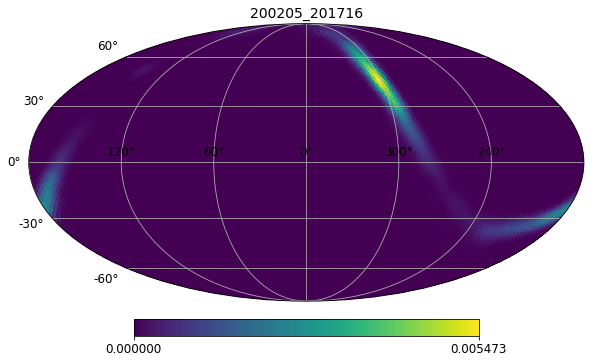

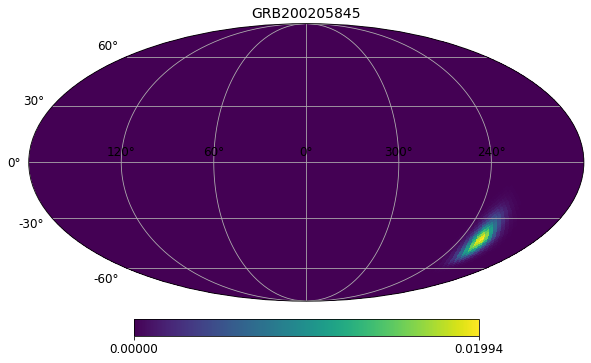

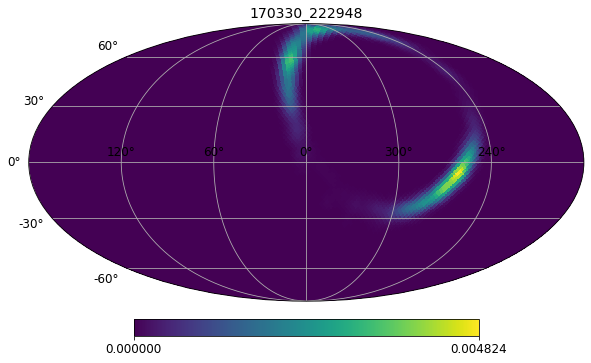

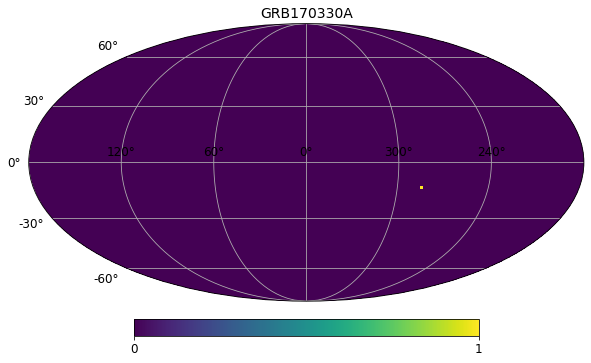

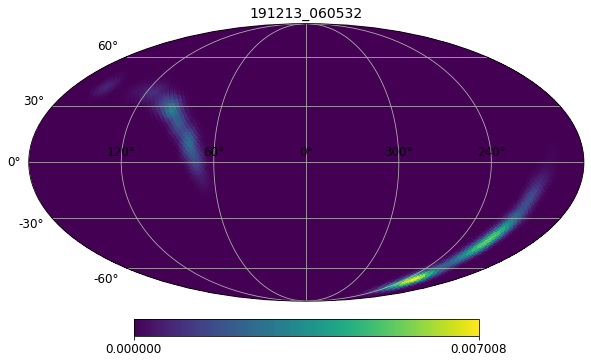

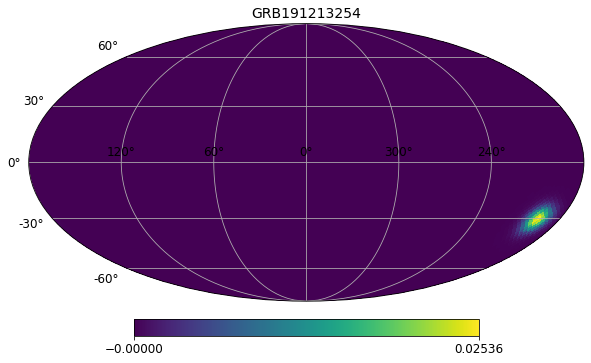

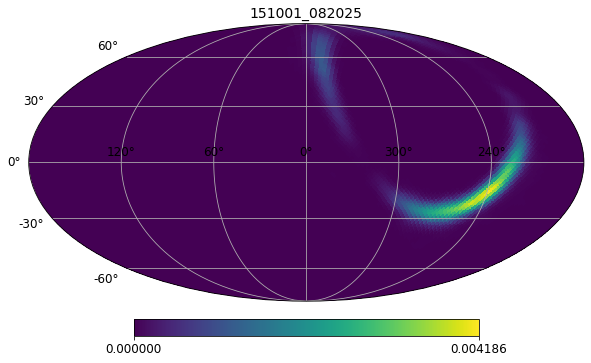

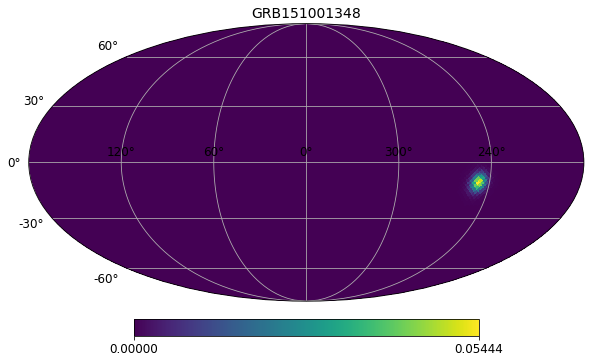

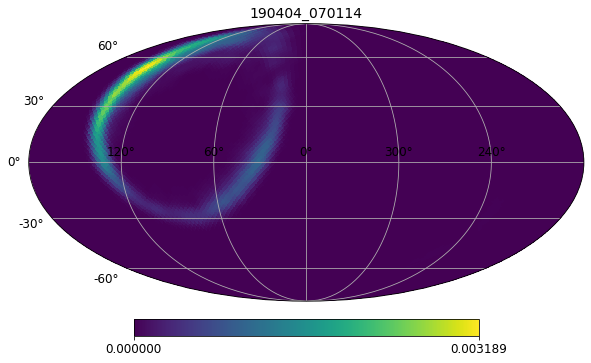

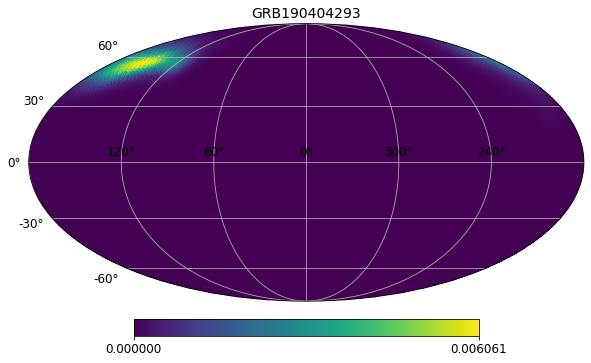

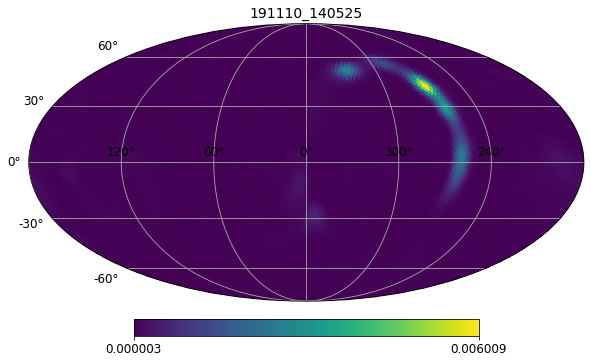

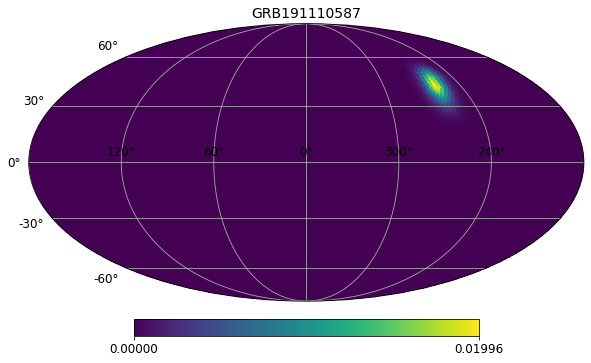

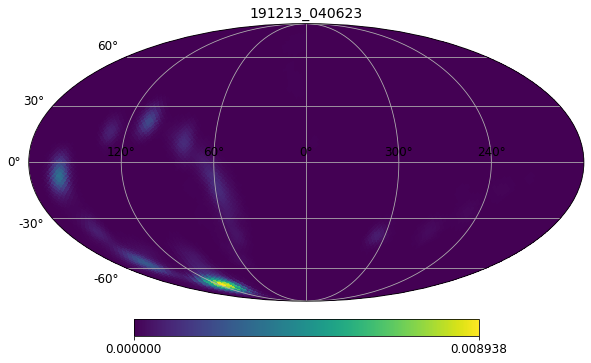

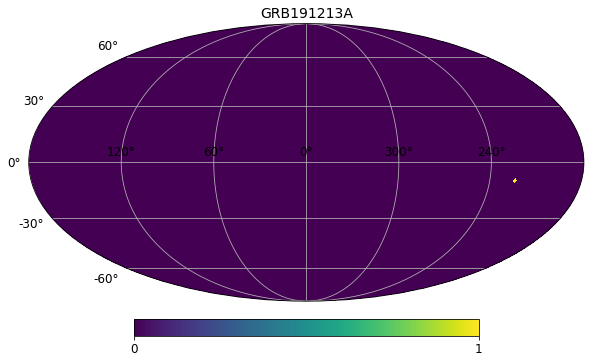

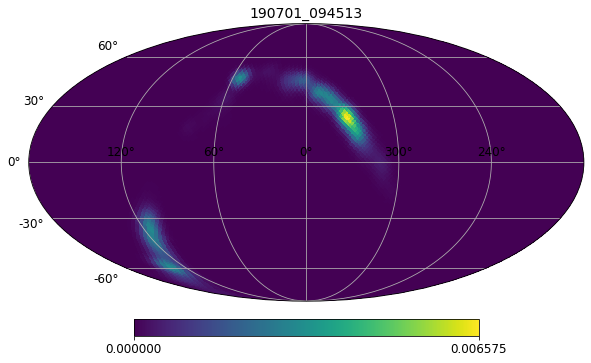

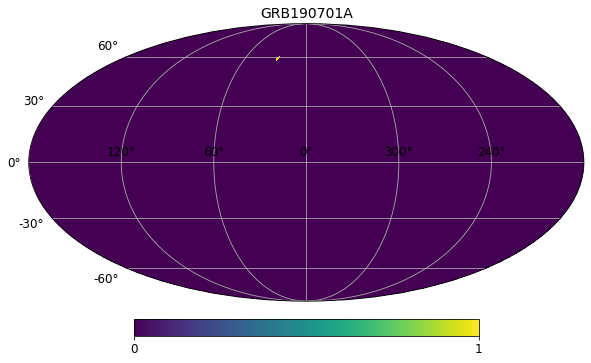

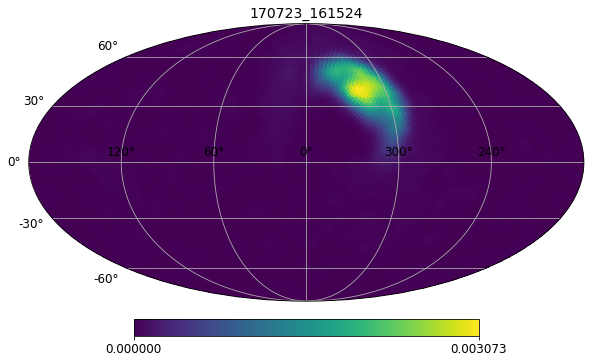

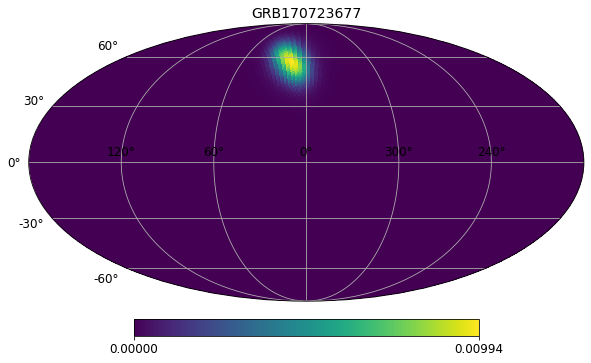

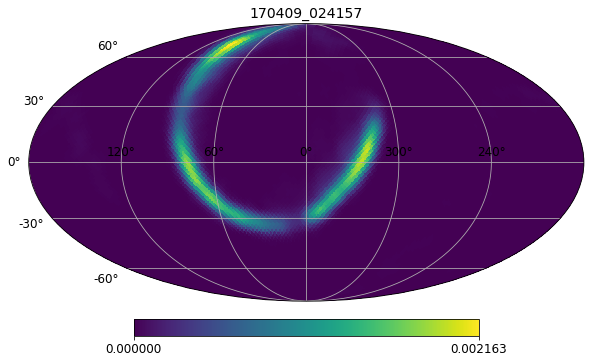

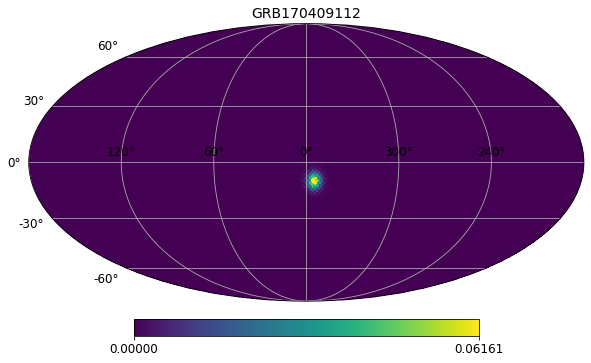

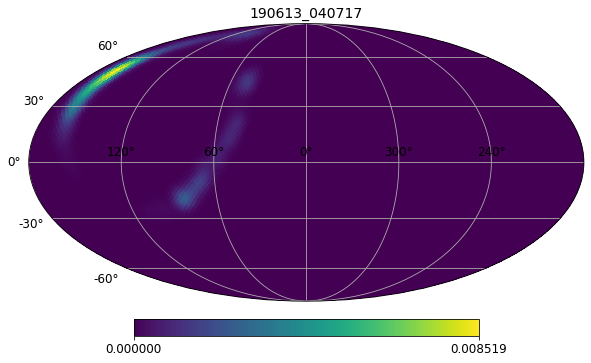

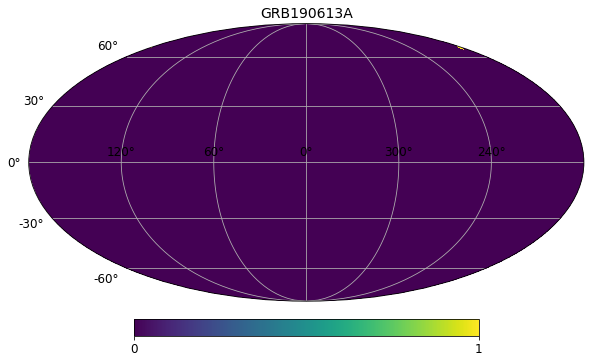

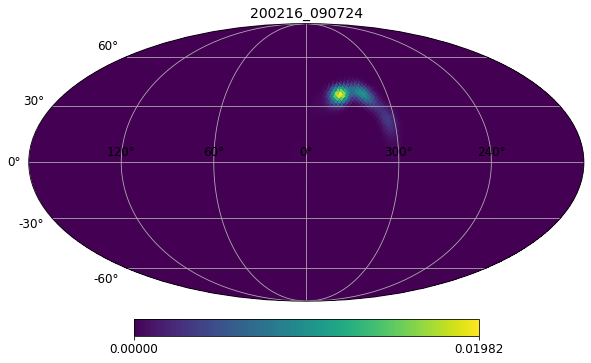

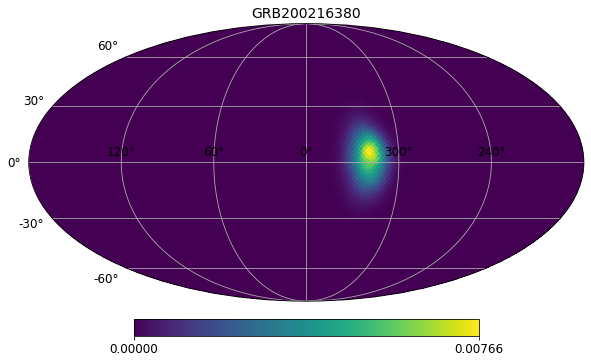

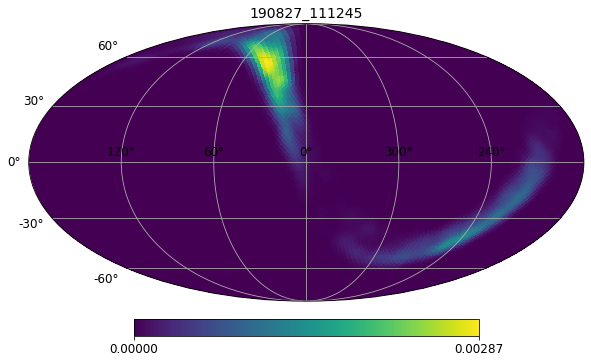

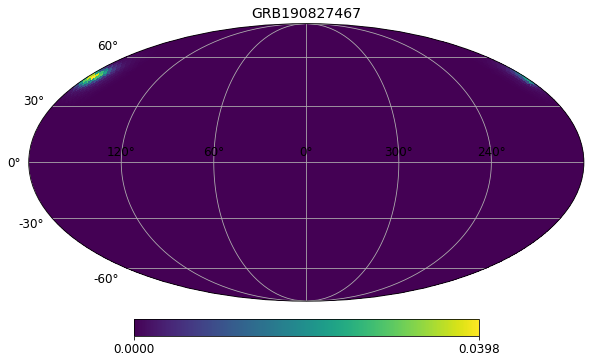

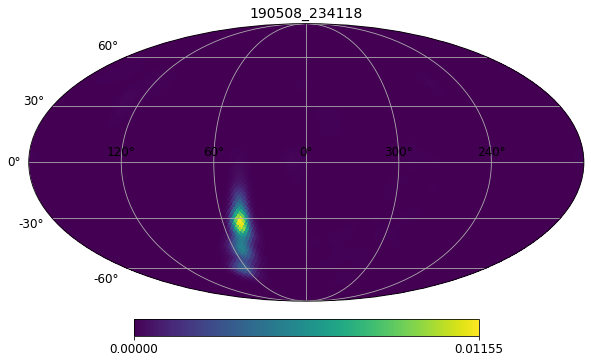

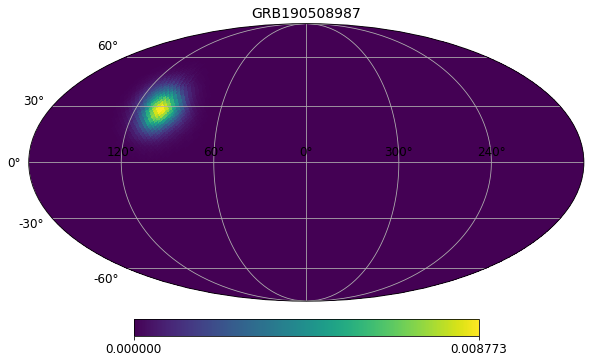

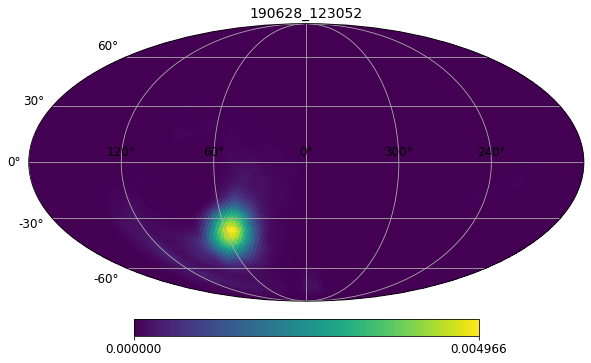

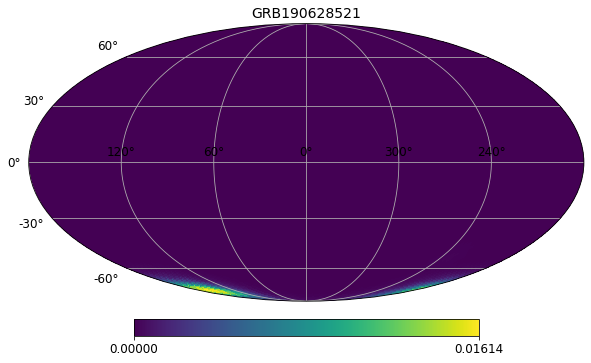

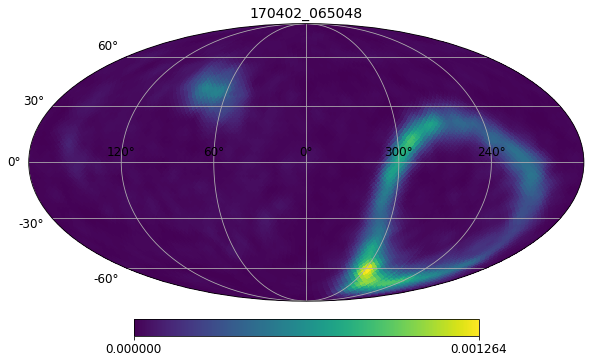

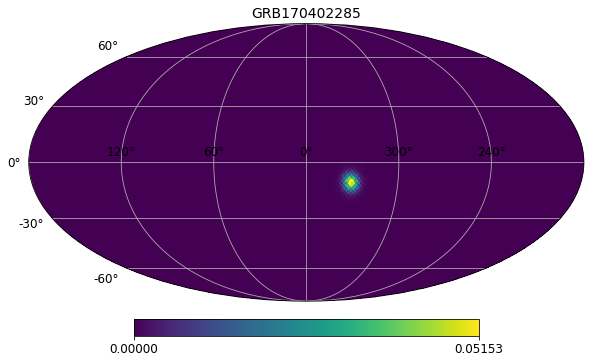

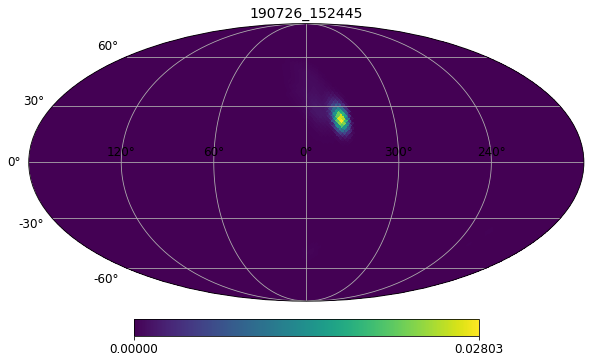

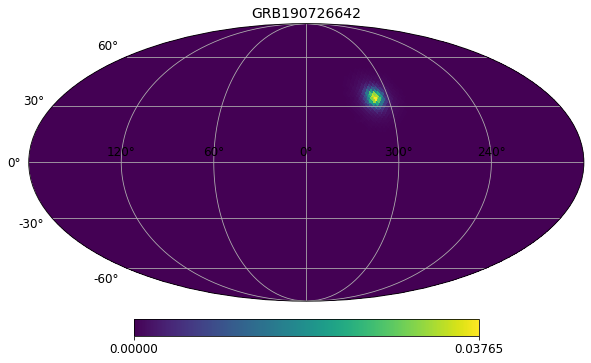

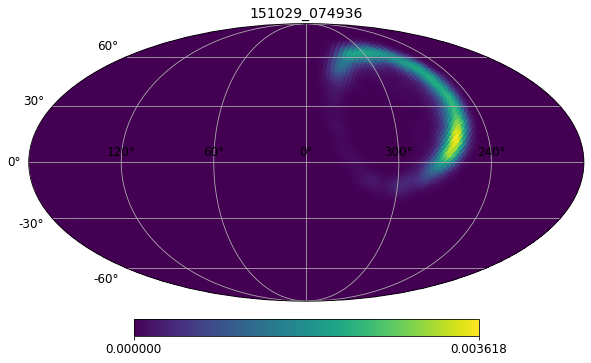

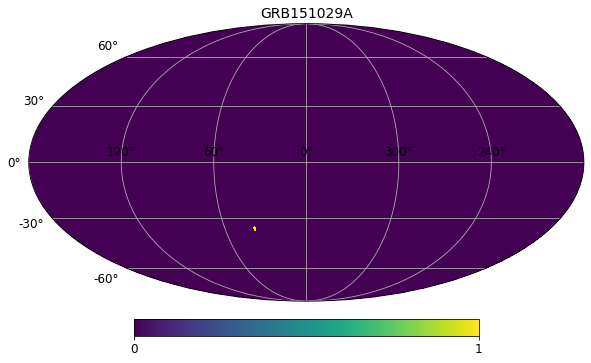

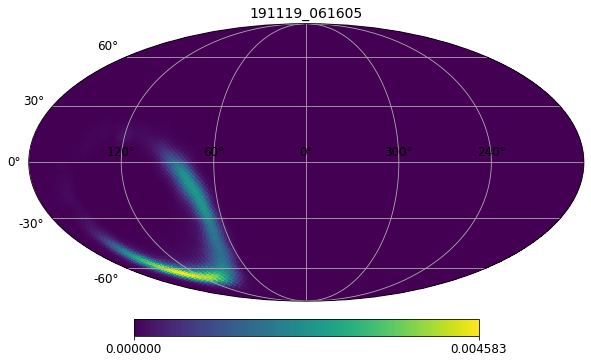

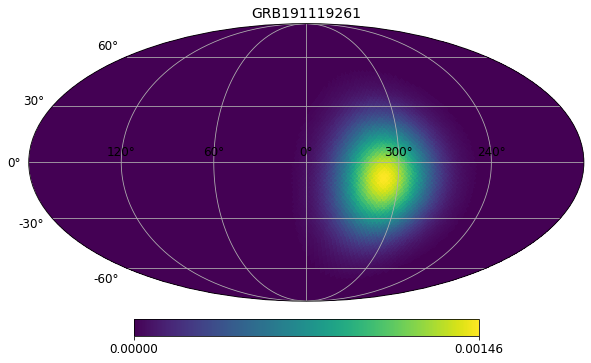

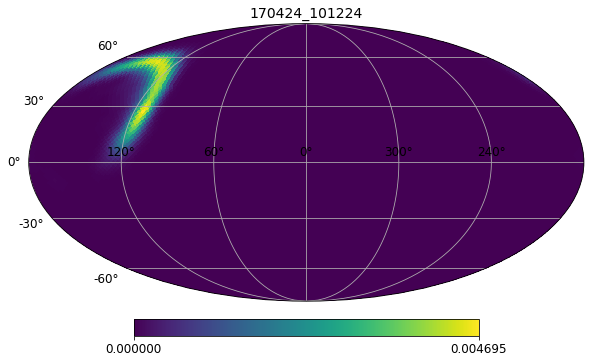

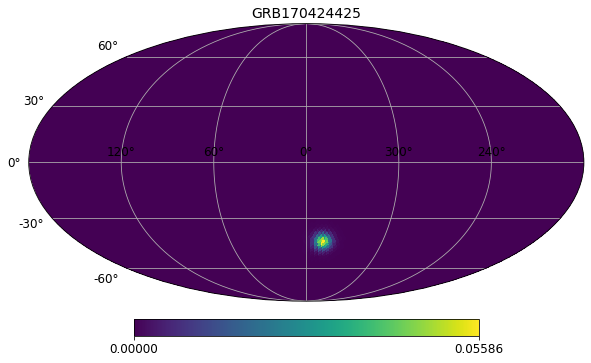

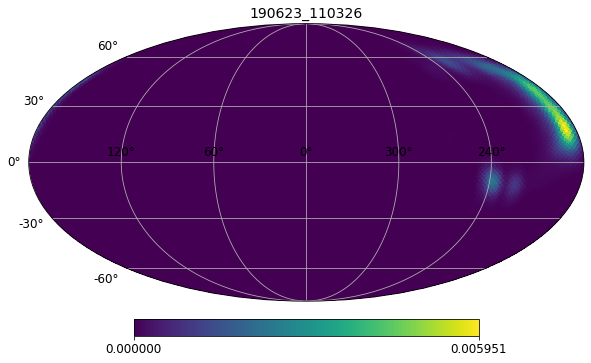

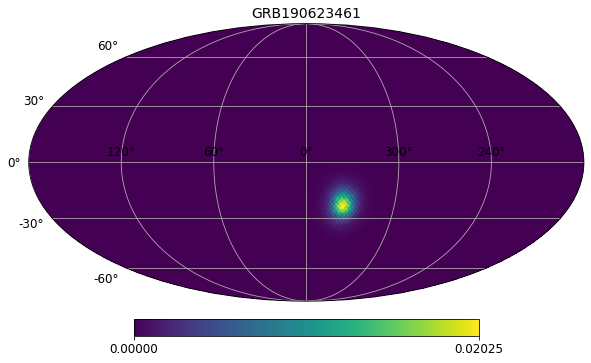

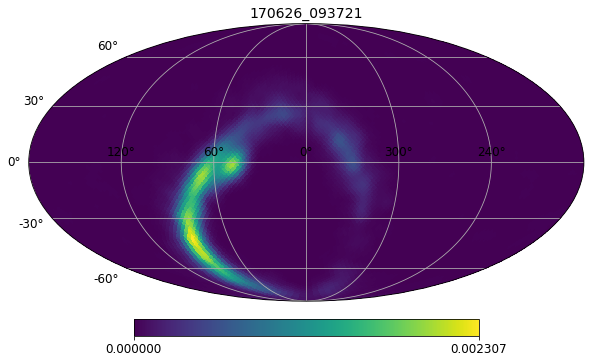

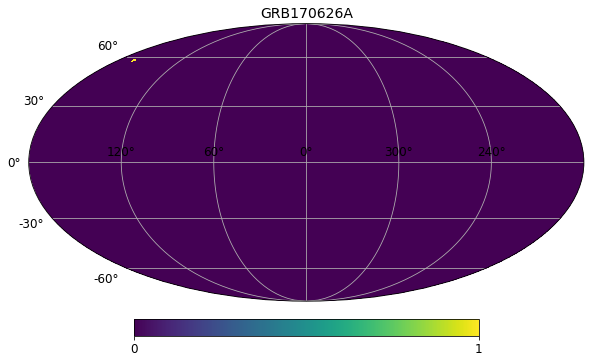

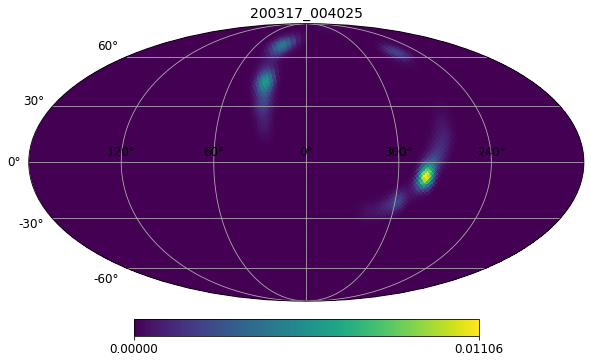

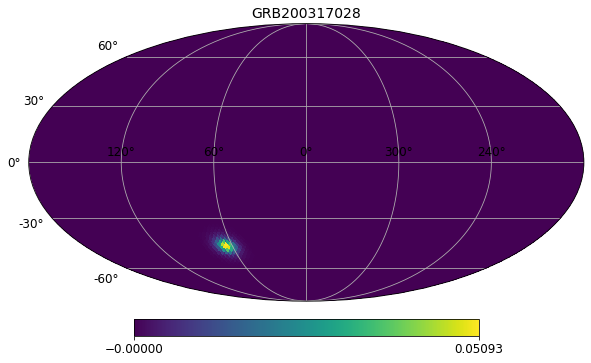

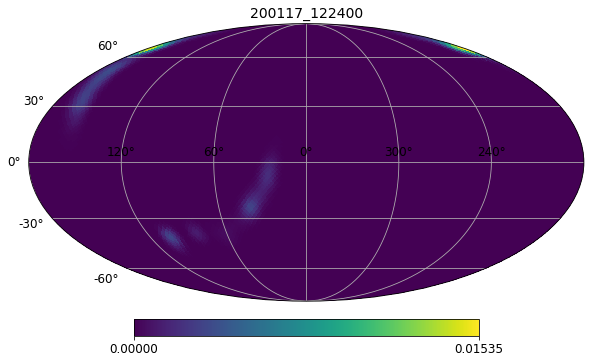

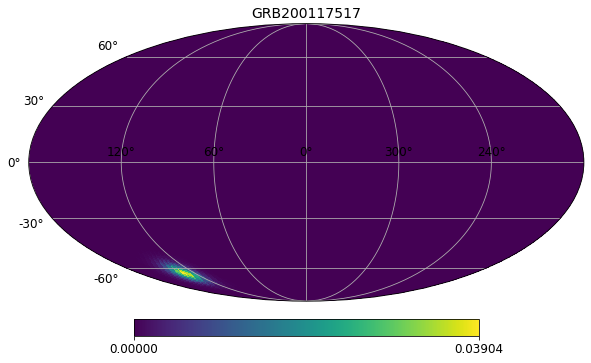

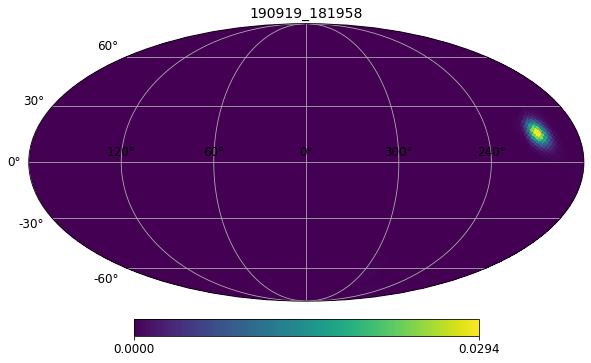

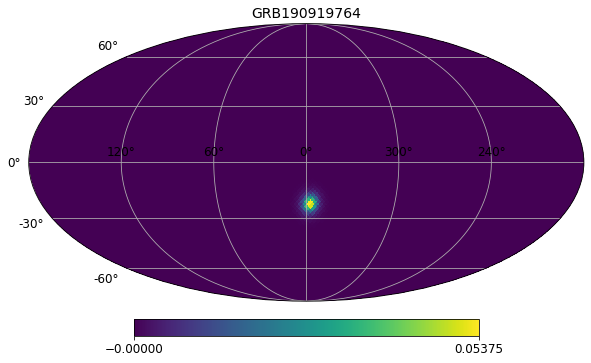

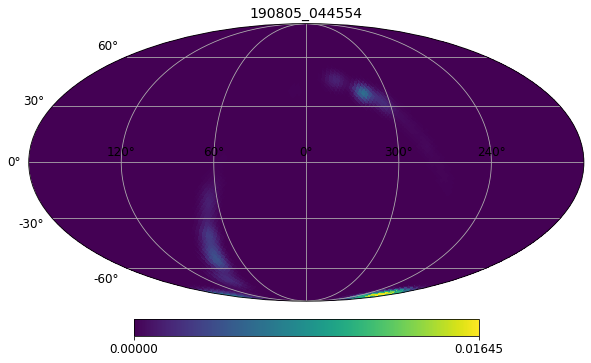

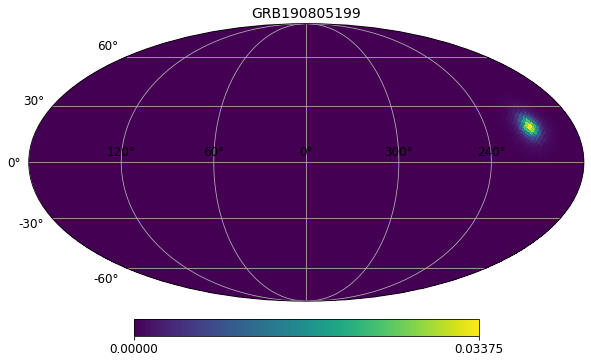

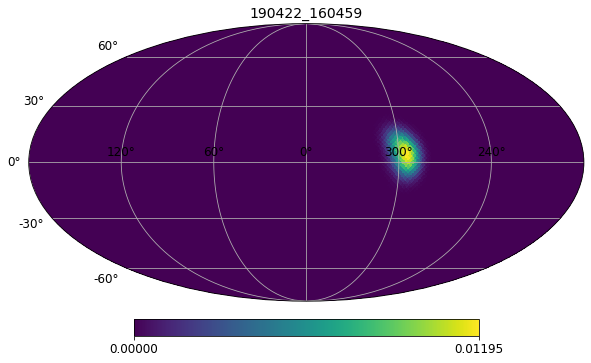

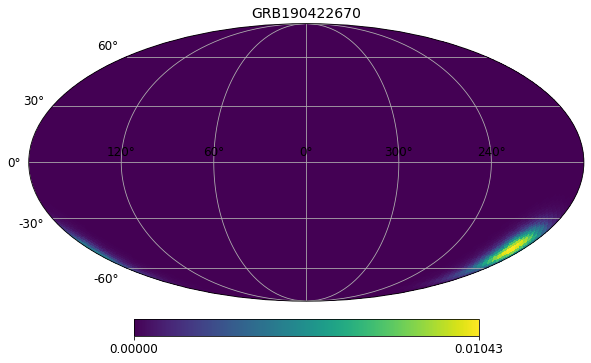

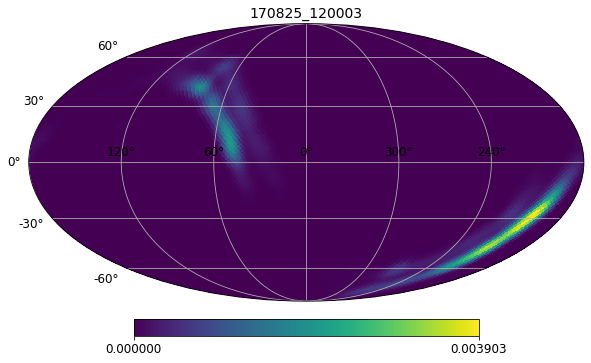

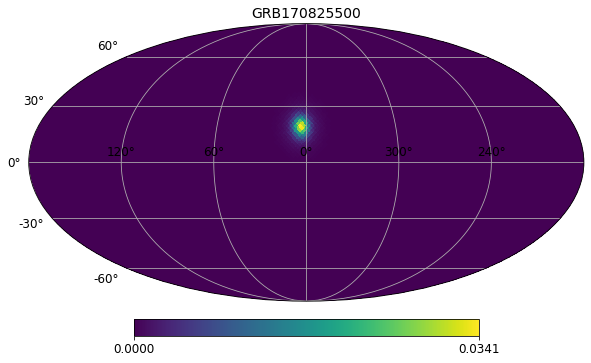

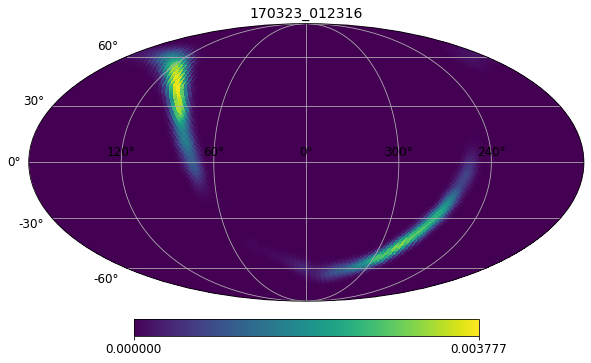

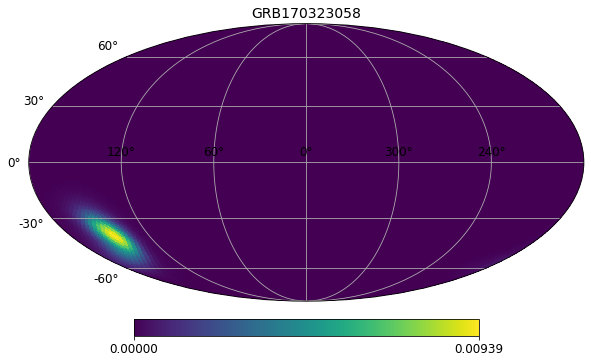

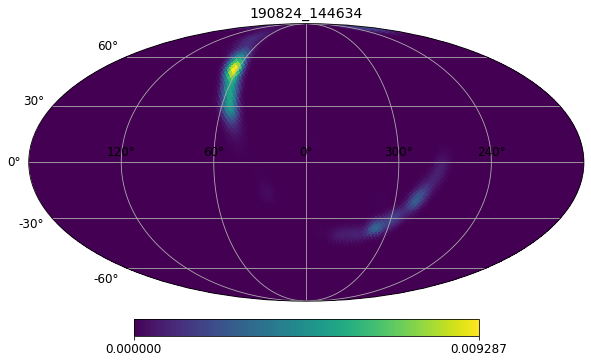

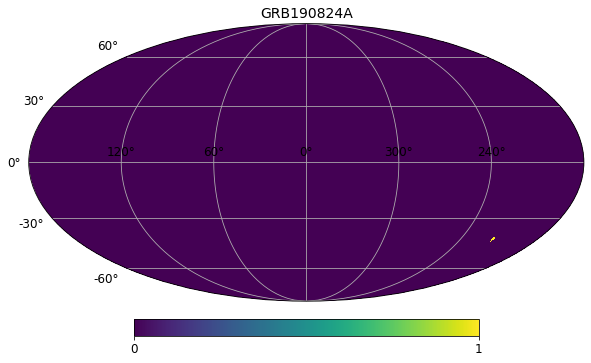

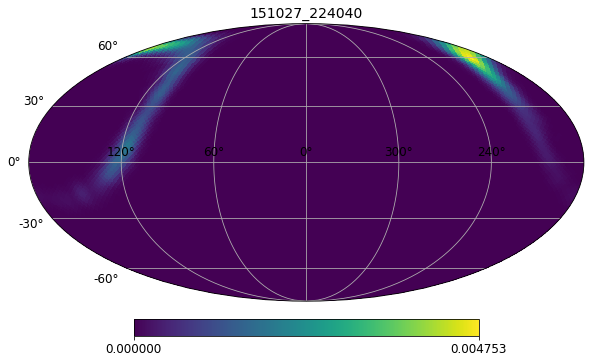

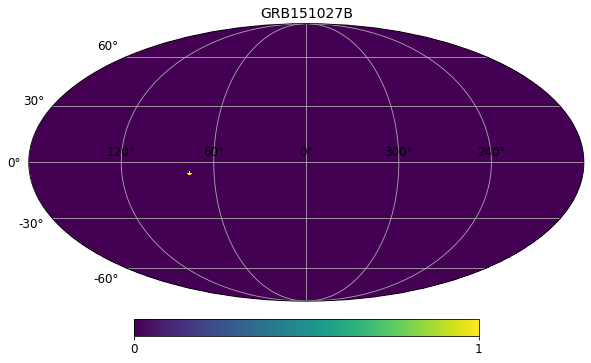

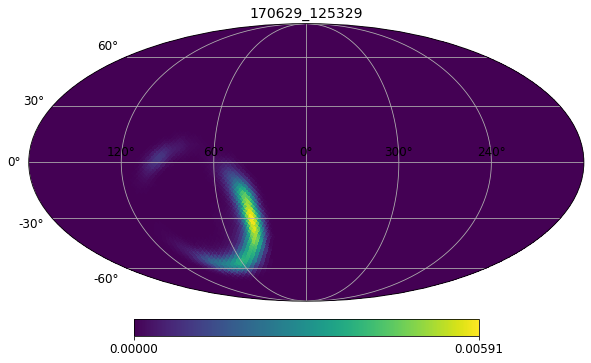

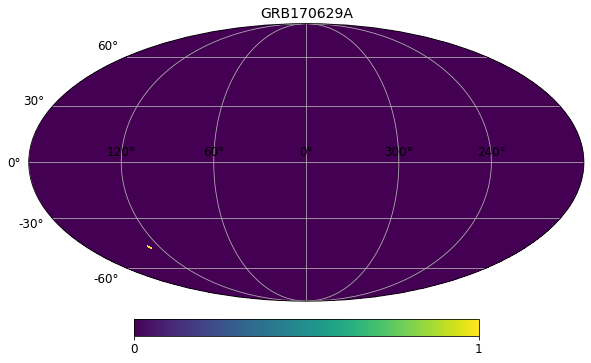

In [52]:
grbsky = h5py.File('/work/yifan.wang/grb/git-notebooks/make_grb_background/background_merge_lgrb_corrgaussian.hdf','r')

for i in range(len(result['gwname'])):
    gwname = result['gwname'].values[i]
    grbname = result['grbname'].values[i]
    
    t = result['gwtime'].values[i] 
    t = Time(t)
    
    if t>tO1_start and t<tO1_end:
        o = 'o1'
    elif t>tO2_start and t<tO2_end:
        o = 'o2'
    elif t>tO3a_start and t<tO3a_end:
        o = 'o3a'
    elif t>tO3b_start and t<tO3b_end:
        o = 'o3b'
    gw = h5py.File('/work/yifan.wang/grb/gwrun/gwskymap/gwskymap_'+str(o)+'.hdf','r')
    projview(gw[gwname][:],
         coord=["C"], graticule=True, graticule_labels=True,projection_type="mollweide",title=gwname)
    projview(grbsky[grbname][:],
         coord=["C"], graticule=True, graticule_labels=True,projection_type="mollweide",title=grbname)

In [8]:
grbsky = h5py.File('/work/yifan.wang/grb/git-notebooks/make_grb_background/background_merge_lgrb_corrgaussian.hdf','r')

for i in range(len(result['gwname'])):
    gwname = result['gwname'].values[i]
    grbname = result['grbname'].values[i]
    
    t = result['gwtime'].values[i] 
    t = Time(t)
    
    if t>tO1_start and t<tO1_end:
        o = 'o1'
    elif t>tO2_start and t<tO2_end:
        o = 'o2'
    elif t>tO3a_start and t<tO3a_end:
        o = 'o3a'
    elif t>tO3b_start and t<tO3b_end:
        o = 'o3b'
    gw = h5py.File('/work/yifan.wang/grb/gwrun/gwskymap/gwskymap_'+str(o)+'.hdf','r')
    b = np.sum(gw[gwname][:]*grbsky[grbname][:]) * len(gw[gwname][:])
    gwsum = np.sum(gw[gwname][:])
    grbsum = np.sum(grbsky[grbname][:])
    print( gwsum, grbsum,b)

1.0 1.0 3.870895028114319
1.0 1.0 0.8799102902412415
0.99999994 1.0 1.0648056864738464
1.0 0.9999999999999999 7.386079502127117
1.0 1.0000001 8.69406509399414
1.0 0.9999998 16.87051248550415
1.0 1.0 0.411312460899353
1.0 1.0 0.2163972482085228
1.0 1.0 1.4770888115317982
1.0 1.0 1.217854840760503
0.9999999 1.0 0.3288385346531868
0.9999999 1.0 0.5345441848039627
1.0 1.0000001 0.1656433828175068
1.0 1.0 0.3350609242916107
1.0 0.9999999 0.30520467460155487
1.0 0.9999999999999998 0.16509470605963597
1.0 1.0000001 0.13754579052329063
1.0000001 1.0 0.009118987480178475
1.0 1.0 0.0005340193456504494
1.0 1.0 0.031120399047510676
1.0 1.0 0.03433761186897755
1.0 1.0 0.050544535741209984
1.0 1.0 0.006377100711688399
1.0 1.0 0.00040689355228096247
1.0 1.0 0.0005826899141538888
1.0 1.0 8.79409356002725e-07
1.0 1.0 2.1886076950750066e-07
0.99999994 1.0 0.00099455427831147
1.0 0.9999999999999999 8.065541194278378e-07
1.0 1.0 0.0
1.0 1.0 0.0
1.0 1.0 0.0
